In [42]:
import fitsio
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from time import time

In [28]:
targets_path = "/global/cfs/projectdirs/desi/target/catalogs/dr8/0.42.0/targets/main/resolve/dark"

filenum=0

while filenum<50:
    filename = os.path.join(targets_path, "targets-dark-hp-{}.fits".format(str(filenum))) #El primero fue el 9
    pairs_path="/global/cscratch1/sd/mvgarcia/QSO_pairs/pair_coord_{}.1".format(str(filenum))

    columns = ['TARGETID', 'DESI_TARGET', 'MWS_TARGET', 
               'BGS_TARGET', 'SUBPRIORITY', 'NUMOBS_INIT', 
               'PRIORITY_INIT', 'RA', 'DEC', 'HPXPIXEL', 
               'BRICKNAME', 'FLUX_R', 'FLUX_G', 'FLUX_Z',
               'MW_TRANSMISSION_G','MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z']
    if(os.path.exists(filename) and (os.path.exists(pairs_path)==False)):
        print("Entro")
        filein = fitsio.FITS(filename)
        data = filein[1].read(columns=columns)

In [ ]:
targets_path = "/global/cfs/projectdirs/desi/target/catalogs/dr8/0.42.0/targets/main/resolve/dark"

filenum=0

def distancia(ra1,dec1,raArray, decArray):
    rad=np.arccos(np.around(((np.sin(dec1)*np.sin(decArray))+(np.cos(dec1)*np.cos(decArray)*np.cos(ra1-raArray))),10))
    arcsec=np.rad2deg(rad)*60*60 #revisar
    return arcsec

while filenum<50:
    print("Filenum:{}".format(str(filenum)))
    filename = os.path.join(targets_path, "targets-dark-hp-{}.fits".format(str(filenum))) #El primero fue el 9
    pairs_path="/global/cscratch1/sd/mvgarcia/QSO_pairs/pair_coord_{}.1".format(str(filenum))

    columns = ['TARGETID', 'DESI_TARGET', 'MWS_TARGET', 
               'BGS_TARGET', 'SUBPRIORITY', 'NUMOBS_INIT', 
               'PRIORITY_INIT', 'RA', 'DEC', 'HPXPIXEL', 
               'BRICKNAME', 'FLUX_R', 'FLUX_G', 'FLUX_Z',
               'MW_TRANSMISSION_G','MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z']
    if(os.path.exists(filename) and (os.path.exists(pairs_path)==False)):
        filein = fitsio.FITS(filename)
        data = filein[1].read(columns=columns)
        
        is_qso = (data['DESI_TARGET'] & 4)!=0
        data_qso = data[is_qso]
        print("Total QSOs:",len(data_qso))
        
        ra=np.deg2rad(data_qso['RA'])
        dec=np.deg2rad(data_qso['DEC'])

        distance=[]
        indexes=[]
        ti=time()
        for i in range(len(ra)):
            dist=distancia(ra[i],dec[i],ra,dec)
            ind= np.where(dist<10)[0]
            ind= ind[np.where(ind!=i)]
            dist=dist[ind]
            if(len(dist)>0): 
                for j in range(len(ind)):
                    if([ind[j],i] not in indexes) :
                        indexes.append([i,ind[j]])
                        distance=np.append(distance, dist[j])
        indexes=np.array(indexes)
        tf=time()
        tiempo=tf-ti
        print("Time:",tiempo)
        print("Num Pairs:", len(distance))
        
        RA=data_qso['RA']
        DEC=data_qso['DEC']
        ID=data_qso['TARGETID']
        
        new=[]
        for i in range(len(indexes)):
            new.append([RA[indexes[i][0]],DEC[indexes[i][0]],RA[indexes[i][1]],DEC[indexes[i][1]],ID[indexes[i][0]],ID[indexes[i][1]]])
        np.savetxt("pair_coord_hp{}".format(str(filenum)), new)
        
        file=np.loadtxt("pair_coord_hp{}".format(str(filenum)))

        ra1=file[:,0]
        dec1=file[:,1]
        ra2=file[:,2]
        dec2=file[:,3]
        
        plt.scatter(ra1,dec1, s=0.5, label="QSO1")
        plt.scatter(ra2,dec2, s=0.5,label="QSO2")
        plt.xlabel("$RA\;(\degree$)")
        plt.ylabel("$DEC\;(\degree$)")
        plt.legend()
        plt.savefig("Pairs_hp{}".format(str(filenum)))
        
        ra1=ra1.astype(np.float).astype(np.str)
        dec1=dec1.astype(np.float).astype(np.str)
        ra2=ra2.astype(np.float).astype(np.str)
        dec2=dec2.astype(np.float).astype(np.str)
        id1=file[:,4].astype(np.int).astype(np.str)
        id2=file[:,5].astype(np.int).astype(np.str)

        new1=[np.array(["TARGET_ID","RA","DEC"]).astype(np.str)]
        for i in range(len(ra1)):
            new1.append([id1[i],ra1[i],dec1[i]])

        new2=[np.array(["TARGET_ID","RA","DEC"]).astype(np.str)]
        for i in range(len(ra1)):
            new2.append([id2[i],ra2[i],dec2[i]])

        np.savetxt("pair_coord_{}.1".format(str(filenum)), new1,fmt='%s')
        np.savetxt("pair_coord_{}.2".format(str(filenum)), new2,fmt='%s')
        
    filenum+=1

Filenum:0
Filenum:1
Filenum:2
Filenum:3
Filenum:4
Filenum:5
Filenum:6
Filenum:7
Filenum:8
Total QSOs: 241207
Time: 4440.808653354645
Num Pairs: 1105
Filenum:9
Filenum:10
Filenum:11
Total QSOs: 241419
Time: 4691.171554327011
Num Pairs: 1161
Filenum:12
Total QSOs: 112160
Time: 951.7332134246826
Num Pairs: 841
Filenum:13
Total QSOs: 49300
Time: 194.05042695999146
Num Pairs: 274
Filenum:14
Total QSOs: 98175
Time: 750.3141257762909
Num Pairs: 749
Filenum:15
Total QSOs: 46322
Time: 171.5973823070526
Num Pairs: 271
Filenum:16
Total QSOs: 129507
Time: 1244.2425272464752
Num Pairs: 574
Filenum:17
Total QSOs: 223744
Time: 3628.702402114868
Num Pairs: 879
Filenum:18
Total QSOs: 229420
Time: 3710.843689441681
Num Pairs: 1059
Filenum:19
Total QSOs: 219969
Time: 3714.1059234142303
Num Pairs: 853
Filenum:20
Total QSOs: 70522
Time: 392.90331959724426
Num Pairs: 275
Filenum:21
Total QSOs: 55531
Time: 235.17992973327637
Num Pairs: 339
Filenum:22
Total QSOs: 87900
Time: 575.3231363296509
Num Pairs: 366
F

In [24]:
len(data)

1919697

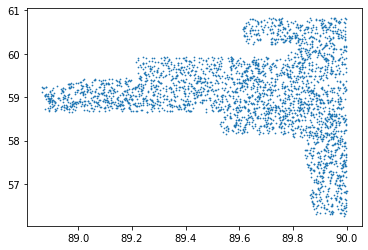

In [5]:
"""r = np.random.random(len(data))
rr = r<0.1"""
plt.scatter(data['RA'], data['DEC'], s=0.5)
#print(len(data[rr]))

Total QSOs: 145288


Text(0, 0.5, '$DEC\\;(\\degree$)')

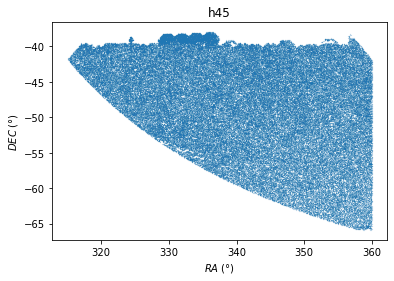

In [4]:
is_qso = (data['DESI_TARGET'] & 4)!=0
data_qso = data[is_qso]
print("Total QSOs:",len(data_qso))
plt.scatter(data_qso['RA'], data_qso['DEC'], s=0.01)
plt.title("h45")
plt.xlabel("$RA\;(\degree$)")
plt.ylabel("$DEC\;(\degree$)")

In [32]:
print(data_qso['RA'], data_qso['DEC'])
ra=np.deg2rad(data_qso['RA'])
dec=np.deg2rad(data_qso['DEC'])

def distancia(ra1,dec1,raArray, decArray):
    rad=np.arccos(np.around(((np.sin(dec1)*np.sin(decArray))+(np.cos(dec1)*np.cos(decArray)*np.cos(ra1-raArray))),10))
    arcsec=np.rad2deg(rad)*60*60 #revisar
    return arcsec

[338.42616063 338.64259924 338.37372528 ... 351.1262887  351.06349934
 351.52322967] [-49.11082886 -49.10066988 -49.1004812  ... -61.93303705 -61.89915417
 -61.89232508]


DISTANCIAS MINIMAS

In [49]:
#Distancias mínimas - histograma
dist_min=[]
ti=time()
for i in range(len(ra)):
    dist=np.sort(distancia(ra[i],dec[i],ra,dec))[1]
    dist_min.append(dist)
tf=time()
tiempo=tf-ti
print("Time:",tiempo)
#dist_min=list(set(dist_min))

Time: 3360.431139230728


145288
1431


Text(0.5, 0, 'Distancia(")')

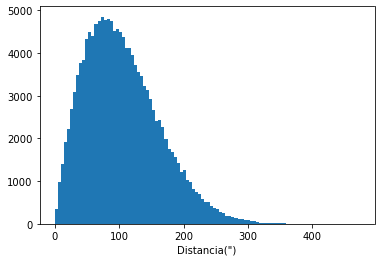

In [51]:
dist_min=np.array(dist_min)
plt.hist(dist_min,bins=100)
print(len(dist_min))
print(len(dist_min[dist_min<10]))
plt.xlabel("Distancia(\")")
#plt.savefig("hist_dist_min_hp9")

Text(0.5, 0, 'Distancia(")')

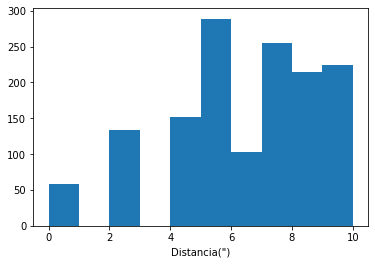

In [52]:
plt.hist(dist_min,range(11))
plt.xlabel("Distancia(\")")

QSO PAIRS

In [33]:
distance=[]
indexes=[]
ti=time()
for i in range(len(ra)):
    dist=distancia(ra[i],dec[i],ra,dec)
    ind= np.where(dist<10)[0]
    ind= ind[np.where(ind!=i)]
    dist=dist[ind]
    if(len(dist)>0): 
        for j in range(len(ind)):
            if([ind[j],i] not in indexes) :
                indexes.append([i,ind[j]])
                distance=np.append(distance, dist[j])
indexes=np.array(indexes)
tf=time()
tiempo=tf-ti
print("Time:",tiempo)
print("Num Pairs:", len(distance))
#print(distance)
#print(indexes)

Time: 1670.648362159729
Num Pairs: 722


In [ ]:
plt.hist(distance)
plt.xlabel("Distancia(\")")

In [30]:
indexes

array([[     8,      9],
       [   615,    616],
       [   817,    818],
       ...,
       [226354, 226355],
       [226458, 226459],
       [226469, 226470]])

In [34]:
RA=data_qso['RA']
DEC=data_qso['DEC']
ID=data_qso['TARGETID']
#new=[["QSO1","QSO2","RA_QSO1", "DEC _QSO1", "RA_QSO2", "DEC_QSO2", "ID_QSO1", "ID_QSO2"]]
new=[]
for i in range(len(indexes)):
    new.append([indexes[i][0],indexes[i][1],RA[indexes[i][0]],DEC[indexes[i][0]],RA[indexes[i][1]],DEC[indexes[i][1]],ID[indexes[i][0]],ID[indexes[i][1]]])
np.savetxt("pair_coord_hp45", new)

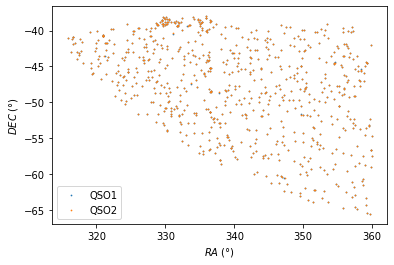

In [36]:
plt.scatter(ra1,dec1, s=0.5, label="QSO1")
plt.scatter(ra2,dec2, s=0.5,label="QSO2")
plt.xlabel("$RA\;(\degree$)")
plt.ylabel("$DEC\;(\degree$)")
plt.legend()
plt.savefig("Pairs_hp45")

In [35]:
data=np.loadtxt("pair_coord_hp45")
i1=data[:,0]
i2=data[:,1]
ra1=data[:,2]
dec1=data[:,3]
ra2=data[:,4]
dec2=data[:,5]
id1=data[:,6]
id2=data[:,7]

In [40]:
file=np.loadtxt("pair_coord_hp1")
ID=data_qso['TARGETID']
ra1=file[0].astype(np.float).astype(np.str)
dec1=file[1].astype(np.float).astype(np.str)
ra2=file[2].astype(np.float).astype(np.str)
dec2=file[3].astype(np.float).astype(np.str)
id1=file[4].astype(np.int).astype(np.str)
id2=file[5].astype(np.int).astype(np.str)

new1=[np.array(["TARGET_ID","RA","DEC"]).astype(np.str)]
new1.append([id1,ra1,dec1])
"""for i in range(len(ra1)):
    new1.append([id1[i],ra1[i],dec1[i]])"""
    
new2=[np.array(["TARGET_ID","RA","DEC"]).astype(np.str)]
new2.append([id2,ra2,dec2])
"""for i in range(len(ra1)):
    new2.append([id2[i],ra2[i],dec2[i]])"""

np.savetxt("pair_coord_1.1", new1,fmt='%s')
np.savetxt("pair_coord_1.2", new2,fmt='%s')

THREE MORE QSOS

In [40]:
import collections

counter=collections.Counter(i1)
counter.update(collections.Counter(i2))
index_qsos=np.array(list(counter.keys()))
repeticiones=np.array(list(counter.values()))

three_more_qsos=np.array(index_qsos[repeticiones>1]).astype(int)
print("Three more qsos",three_more_qsos)
print(len(three_more_qsos))
#print(counter)

Three more qsos [ 11382  47191  69072  69892  72791  72792  79535  79536 115296 136965
 136991  72793  79811]
13


IMAGES

In [4]:
file=open("pair_coord_9.1")
coord=file.readlines()[1:]
coord=np.loadtxt(coord)
ra1=coord[:,1].astype(np.float)
dec1=coord[:,2].astype(np.float)

array([239.31343723, 235.69265094, 237.77186219, ..., 258.94526383,
       258.5221424 , 254.07035494])

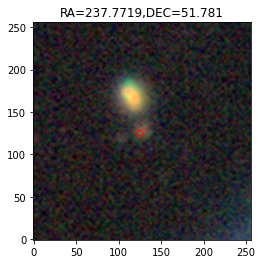

In [9]:
import requests
from PIL import Image
from io import BytesIO

def get_image(url):
    
    """Get image from a URL"""
    
    r = requests.get(url)
    im = Image.open(BytesIO(r.content))
    return im






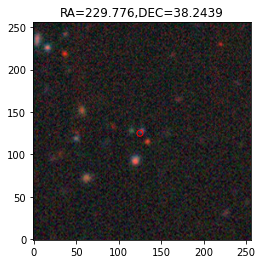

In [15]:
#https://www.legacysurvey.org/viewer?ra=262.3519&dec=52.3043&layer=ls-dr8&zoom=15&targets-dr8
path=" http://legacysurvey.org/viewer/jpeg-cutout/?ra={}&dec={}&layer=ls-dr8&zoom=15&targets-dr8".format(ra1[85],dec1[85])
#path="https://www.legacysurvey.org/viewer/jpeg-cutout/?ra=190.1086&dec=1.2005&layer=dr8&pixscale=0.27&bands=grz"
plt.title("RA={},DEC={}".format(round(ra1[85],4),round(dec1[85],4)))
im=get_image(path)
plt.imshow(im,origin="center")
plt.scatter(125,125,facecolors='none', edgecolors='r')

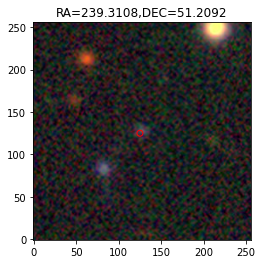

In [43]:
path=" http://legacysurvey.org/viewer/jpeg-cutout/?ra={}&dec={}&layer=ls-dr8&zoom=15&targets-dr8".format(ra2[0],dec2[0])
#path="https://www.legacysurvey.org/viewer/jpeg-cutout/?ra=190.1086&dec=1.2005&layer=dr8&pixscale=0.27&bands=grz"
plt.title("RA={},DEC={}".format(round(ra2[0],4),round(dec2[0],4)))
im=get_image(path)
plt.imshow(im,origin="center")
plt.scatter(125,125,facecolors='none', edgecolors='r')

In [48]:
17*100/240488

0.007068959781777053